# Exploratory data analysis | Spooky Author Identification

The purpose of this work is to analyze the original data set *Spooky Author Identification*.

## The toolset for data analysis

The following Python modules will be primarily used during the study:

In [50]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv('../data/raw/train.csv')
data['text'] = data['text'].str.lower()

In [52]:
eap = data[data['author'] == 'EAP']['text']
hpl = data[data['author'] == 'HPL']['text']
mws = data[data['author'] == 'MWS']['text']

Some samples from the dataset:

In [53]:
data.sample(5)

,id,text,author
3453,id13234,his frankness would have led him to disabuse e...,EAP
12913,id04918,i wished sometimes to shake off all thought an...,MWS
4792,id16153,"even with the utterly lost, to whom life and d...",EAP
8709,id27012,i do not know just how much of the whole tale ...,HPL
4978,id02673,but i am a man of my word mark that you shall ...,EAP


To begin with, we would like to determine the percentage of data belonging to each author.

Text(0.5, 1.0, "Ratio of instances in each author's dataset")

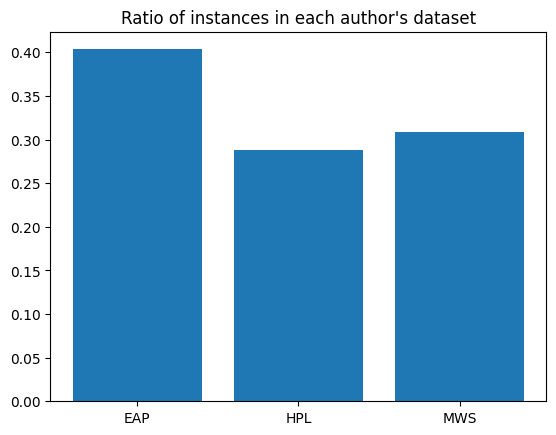

In [54]:
plt.bar(data['author'].unique(),
        data['author'].value_counts(normalize=True, sort=False))
plt.title('Ratio of instances in each author\'s dataset')

It can be said that the data is distributed approximately equally, although EAP takes up 10% more than the other authors.

We need to check the data for outliers, so we find out the distribution of excerpt lengths for each author.

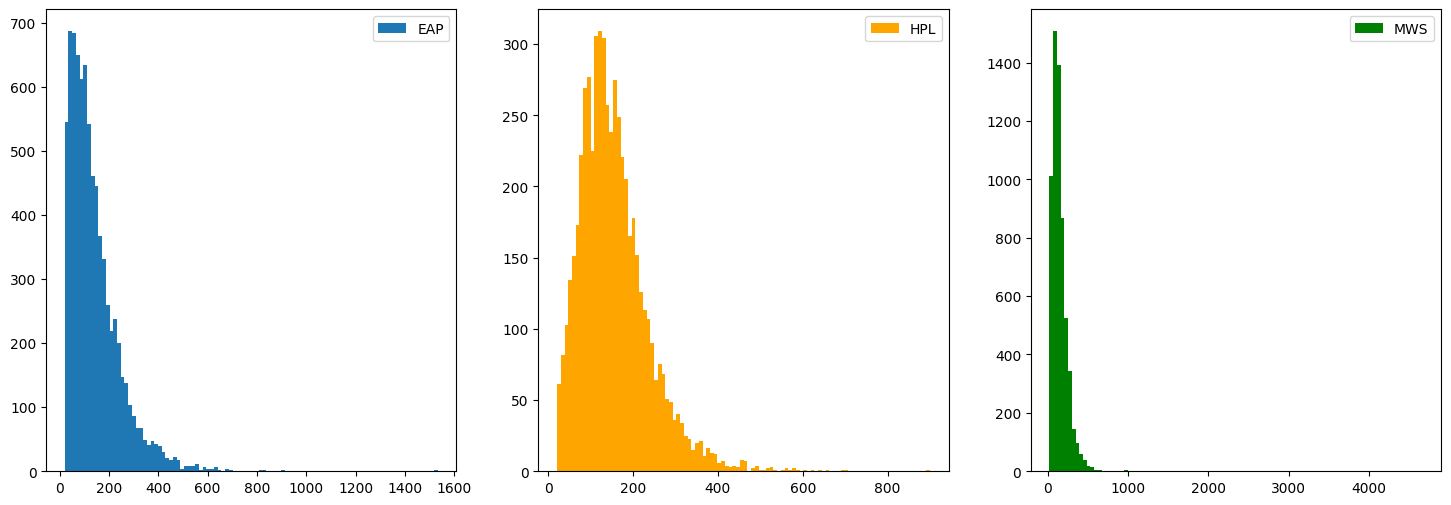

Text(0.5, 0.98, 'Distribution of the length of copies of text of each author')

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

eap_text_len = [len(text) for text in eap]
hpl_text_len = [len(text) for text in hpl]
mws_text_len = [len(text) for text in mws]

axs[0].hist(eap_text_len, bins=100, label='EAP')
axs[0].legend()

axs[1].hist(hpl_text_len, bins=100, label='HPL', color='orange')
axs[1].legend()

axs[2].hist(mws_text_len, bins=100, label='MWS', color='green')
axs[2].legend()

plt.show()

fig.suptitle('Distribution of the length of copies of text of each author')

As we can see, some excerpts are very long; a possible explanation is that the sentence segmentation has several glitches.

Let's count the number of uses of each word relative to each author.

In [56]:
import string

def tokenize(text):
    tokens = list()
    for sentence in text:
            tokens.extend(nltk.tokenize.word_tokenize(sentence))
    return tokens

def filter_punctuation(token):
    return token[0] not in string.punctuation

In [57]:
from collections import Counter

eap_tokens = list(filter(filter_punctuation,
                         tokenize(eap.values.flatten())))
eap_tokens_count = Counter(eap_tokens)

hpl_tokens = list(filter(filter_punctuation,
                         tokenize(hpl.values.flatten())))
hpl_tokens_count = Counter(hpl_tokens)

mws_tokens = list(filter(filter_punctuation,
                         tokenize(mws.values.flatten())))
mws_tokens_count = Counter(mws_tokens)

Text(0.5, 0.98, 'Most frequently used words by each author')

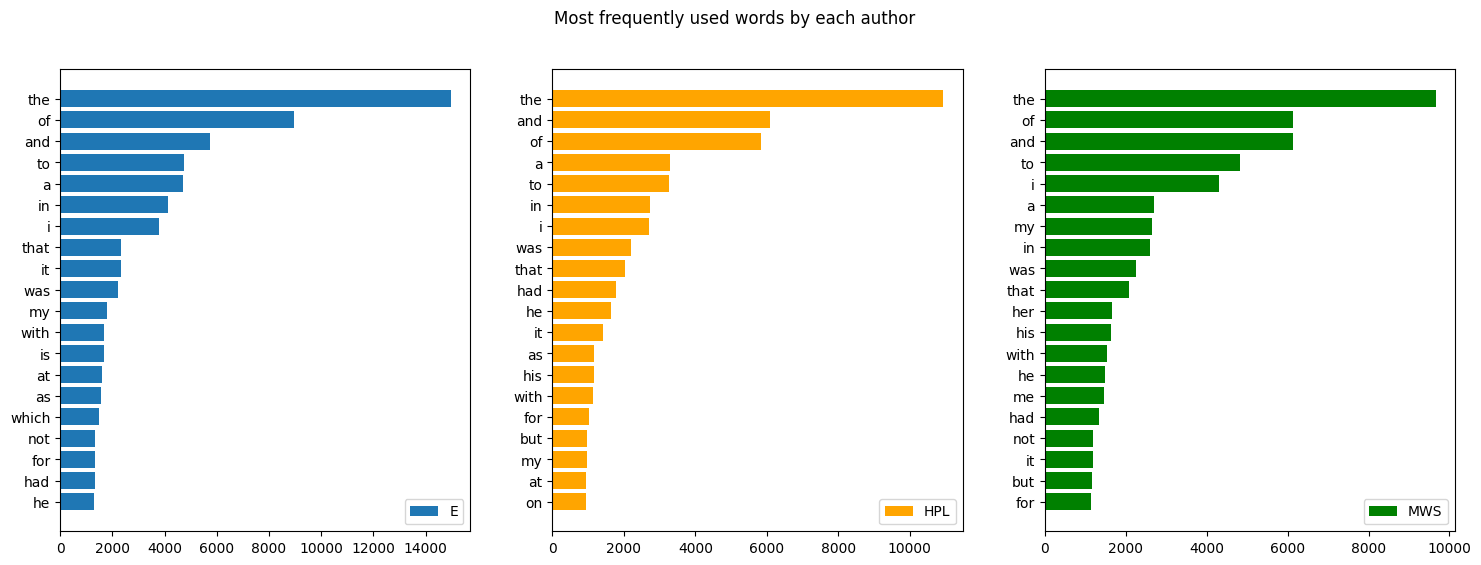

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].barh(dict(eap_tokens_count.most_common(20)).keys(),
            dict(eap_tokens_count.most_common(20)).values(),
            label='EAP')
axs[0].invert_yaxis()
axs[0].legend('EAP')

axs[1].barh(dict(hpl_tokens_count.most_common(20)).keys(),
            dict(hpl_tokens_count.most_common(20)).values(),
            label='HPL', color='orange')
axs[1].invert_yaxis()
axs[1].legend()

axs[2].barh(dict(mws_tokens_count.most_common(20)).keys(),
            dict(mws_tokens_count.most_common(20)).values(),
            label='MWS', color='green')
axs[2].invert_yaxis()
axs[2].legend()

fig.suptitle('Most frequently used words by each author')

Let's repeat the previous step, but only remove stop words.

In [59]:
from nltk.corpus import stopwords

nltk.download('stopwords')

def filter_stopwords(token):
    stop_words = set(stopwords.words('english'))
    return token not in stop_words

[nltk_data] Downloading package stopwords to /home/ildar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
eap_tokens_filtered = list(filter(filter_stopwords,
                                  eap_tokens))
eap_tokens_count = Counter(eap_tokens_filtered)

hpl_tokens_filtered = list(filter(filter_stopwords,
                                  hpl_tokens))
hpl_tokens_count = Counter(hpl_tokens_filtered)

mws_tokens_filtered = list(filter(filter_stopwords,
                                  mws_tokens))
mws_tokens_count = Counter(mws_tokens_filtered)

Text(0.5, 0.98, 'Most frequently used words by each author (excluding stop words)')

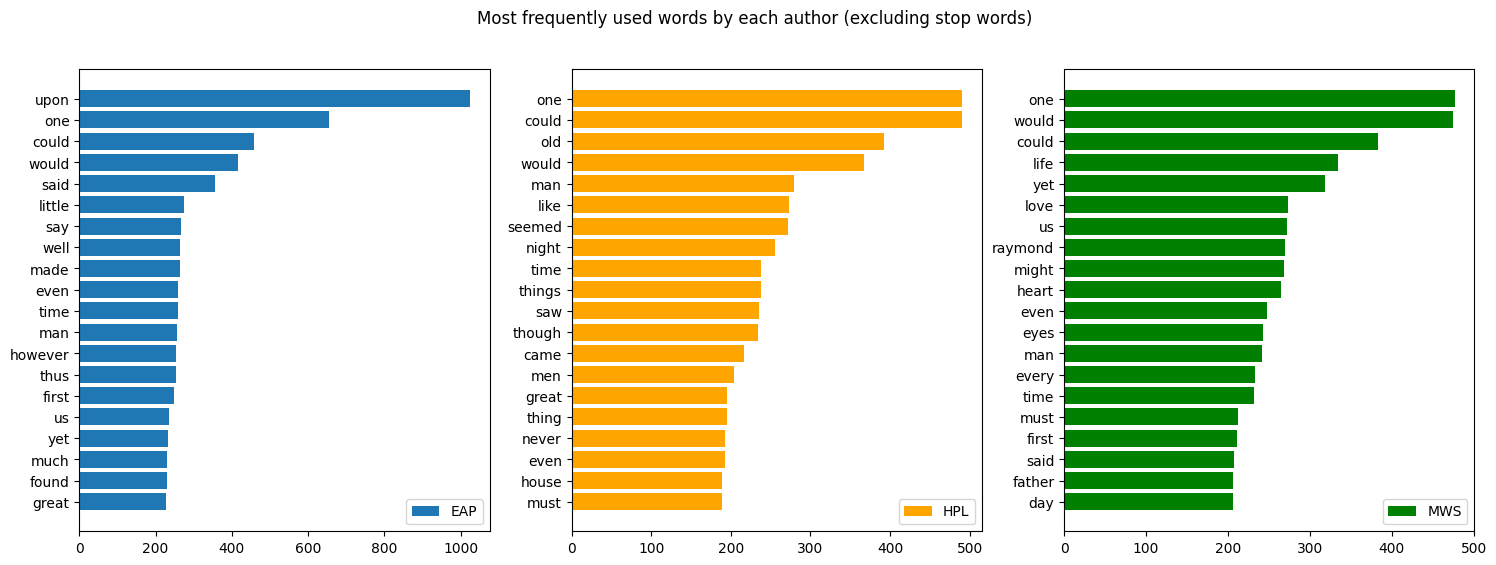

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].barh(dict(eap_tokens_count.most_common(20)).keys(),
            dict(eap_tokens_count.most_common(20)).values(),
            label='EAP')
axs[0].invert_yaxis()
axs[0].legend()

axs[1].barh(dict(hpl_tokens_count.most_common(20)).keys(),
            dict(hpl_tokens_count.most_common(20)).values(),
            label='HPL', color='orange')
axs[1].invert_yaxis()
axs[1].legend()

axs[2].barh(dict(mws_tokens_count.most_common(20)).keys(),
            dict(mws_tokens_count.most_common(20)).values(),
            label='MWS', color='green')
axs[2].invert_yaxis()
axs[2].legend()

fig.suptitle('Most frequently used words by each author (excluding stop words)')

For everything else, I would like to know if there are words that are unique to each author, that is, used only by him.

Text(0.5, 1.0, 'Number of unique words per author')

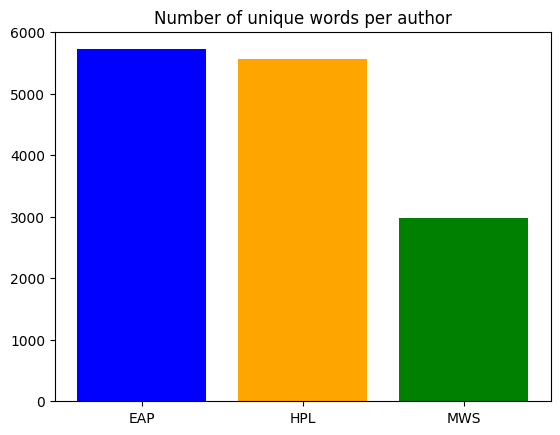

In [62]:
eap_tokens_unique = set(eap_tokens) - set(hpl_tokens) - set(mws_tokens)
hpl_tokens_unique = set(hpl_tokens) - set(mws_tokens) - set(eap_tokens)
mws_tokens_unique = set(mws_tokens) - set(eap_tokens) - set(hpl_tokens)

fig, ax = plt.subplots()
ax.bar(['EAP', 'HPL', 'MWS'], 
       [len(eap_tokens_unique), len(hpl_tokens_unique), len(mws_tokens_unique)],
       color=['blue', 'orange', 'green'])
ax.set_title('Number of unique words per author')

As we can see, such words do exist. And sometimes their number can take up a third of the author's vocabulary.